In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sc
plt.style.use("ggplot")

In [3]:
ws = pd.read_csv("./Wind_Speed.csv")

In [4]:
ws = ws.iloc[:, -1]

In [6]:
ws.head()

0    2.61
1    2.77
2    2.86
3    2.87
4    2.92
Name: WS10M, dtype: float64

In [12]:
def weib(v, c, k):
    return (k/c) * (v/c)**(k-1) * np.exp(- (v/c)**k)
k = (math.sqrt(np.mean(abs(ws - np.mean(ws))**2)) / np.mean(ws)) ** -1.089
Gamma_f = math.exp(sc.gammaln(1 + 1/k))
c = (np.mean(ws)/Gamma_f)

In [13]:
weibull = weib(ws, c, k)

In [16]:
weibull_df = pd.DataFrame(weibull.rename("Probability"))

In [17]:
weibull_df

,Probability
0,0.263175
1,0.263308
2,0.262275
3,0.262112
4,0.261159
...,...
8755,0.263515
8756,0.263450
8757,0.256232
8758,0.251299


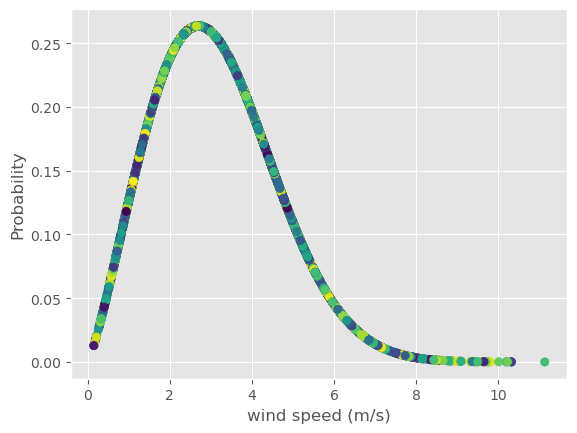

In [20]:
N = 8760
colors = np.random.rand(N)
plt.scatter(ws, weibull_df, c=colors, zorder=2)
plt.xlabel("wind speed (m/s)");
plt.ylabel("Probability");